# Predicting Salary Based on Years of Experience

### Overview
This notebook demonstrates a step-by-step guide to solving a simple **linear regression problem** using PyTorch. The goal is to predict an individual's salary based on their years of experience. The project covers the following:

1. Generating a synthetic dataset.
2. Visualizing the data distribution.
3. Preparing the data for training and testing.
4. Building a linear regression model in PyTorch.
5. Training the model and evaluating its performance.
6. Saving and loading the model for future use.

### Libraries Used
- **NumPy**: For numerical computations and dataset generation.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib & Seaborn**: For data visualization.
- **PyTorch**: For building and training the machine learning model.

### Objective
By the end of this project, you will have a clear understanding of how to implement a simple linear regression model in PyTorch and build a foundation for more complex problems such as classification, object detection, and segmentation.

---

Let's get started! 🚀

In [56]:
# imporing all required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
print("all required libraries imported!")

all required libraries imported!


In [57]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random years of experience (between 1 and 20)
years_of_experience = np.random.uniform(1, 20, 1000)

# Generate corresponding salaries with some noise (base_salary + experience_weight * years)
base_salary = 20000 # as this the offset or bias term could be 10000 (10k)
experience_weight = 2500
noise = np.random.normal(0, 2000, 1000)
salaries = base_salary + experience_weight * years_of_experience + noise

# Combine into a Pandas DataFrame
data = pd.DataFrame({
    "YearsExperience": years_of_experience,
    "Salary": salaries
})

# Save the dataset to a CSV file (optional)
data.to_csv("salary_data.csv", index=False)

print(data.head())

   YearsExperience        Salary
0         8.116262  40646.057647
1        19.063572  64988.240837
2        14.907885  58030.107938
3        12.374511  52157.449490
4         3.964354  31030.466317


In [60]:
# printing some information about the data
print("dataset shape:", data.shape)
print("dataset num of samples:", data.shape[0])
print("dataset num of features:", data.shape[1])
print("dataset columns:", data.columns)

dataset shape: (1000, 2)
dataset num of samples: 1000
dataset num of features: 2
dataset columns: Index(['YearsExperience', 'Salary'], dtype='object')


In [63]:
print("dataset info:\n", data.info())
print("dataset describe:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  1000 non-null   float64
 1   Salary           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
dataset info:
 None
dataset describe:
        YearsExperience        Salary
count      1000.000000   1000.000000
mean         10.314875  45984.977919
std           5.550610  13926.951840
min           1.088008  19058.756491
25%           5.483492  33510.793938
50%          10.439340  46364.351016
75%          15.142072  57519.949630
max          19.994636  72620.664859


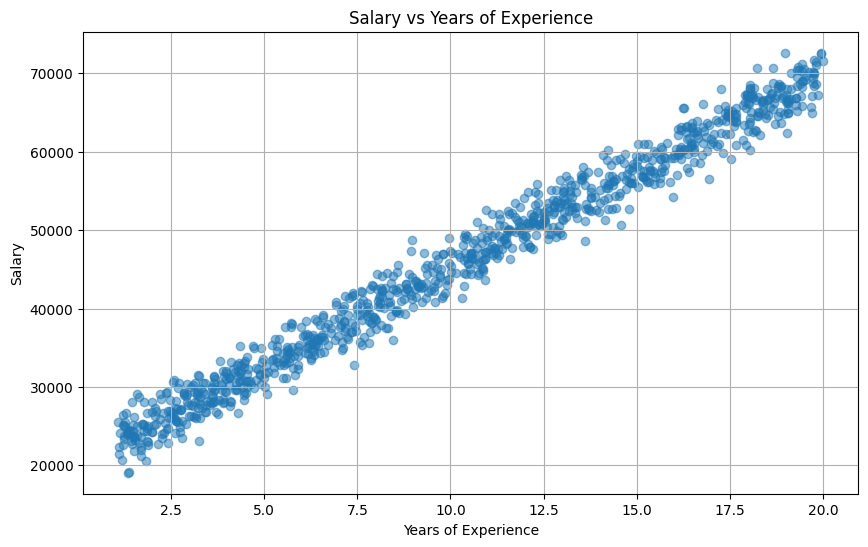

In [58]:
# visulaize the data
def visulaize_data(data: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    plt.scatter(data["YearsExperience"], data["Salary"], alpha=0.5)
    plt.title("Salary vs Years of Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.show()

visulaize_data(data)

as

In [67]:
# splitting data into X and y
X = data["YearsExperience"].values.reshape(-1,1)
y = data["Salary"].values.reshape(-1,1)
print("X data shape:", X.shape)
print("y data shape:", y.shape)
print("X type:", type(X))
print("y type:", type(y))
# converting the data numpy arrays (X,y) into torch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
print("X type:", type(X))
print("y type:", type(y))
print("X shape:", X.shape)
print("y shape:", y.shape)

X data shape: (1000, 1)
y data shape: (1000, 1)
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'torch.Tensor'>
y type: <class 'torch.Tensor'>
X shape: torch.Size([1000, 1])
y shape: torch.Size([1000, 1])


In [68]:
# splitting the data into training and testiing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([800, 1])
X_test shape: torch.Size([200, 1])
y_train shape: torch.Size([800, 1])
y_test shape: torch.Size([200, 1])


In [89]:
# defining out the network architecure
class SalaryNet(nn.Module):
  def __init__(self, name: str):
    super(SalaryNet, self).__init__()
    self.name = name
    self.layer = nn.Linear(1,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer(x)
    x = self.relu(x)
    return x

model = SalaryNet("SalaryNet")
print("name of the model:", model.name)
print("model architecture:")
print(model)

name of the model: SalaryNet
model architecture:
SalaryNet(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (relu): ReLU()
)


In [90]:
# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("starting training loop!")
# training loop
epochs = 10000
for epoch in range(epochs):
  # set the training mode
  model.train()
  # forward pass
  y_pred = model(X_train)
  # compute the loss
  loss = criterion(y_pred, y_train)
  # backward the loss and compute gradients
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{epochs}]: Training Loss: {loss.item()}")
print("finshing training loop!")

starting training loop!
Epoch [100/10000]: Training Loss: 2330602752.0
Epoch [200/10000]: Training Loss: 2330482176.0
Epoch [300/10000]: Training Loss: 2330361088.0
Epoch [400/10000]: Training Loss: 2330240000.0
Epoch [500/10000]: Training Loss: 2330119424.0
Epoch [600/10000]: Training Loss: 2329998848.0
Epoch [700/10000]: Training Loss: 2329877760.0
Epoch [800/10000]: Training Loss: 2329756928.0
Epoch [900/10000]: Training Loss: 2329636096.0
Epoch [1000/10000]: Training Loss: 2329515520.0
Epoch [1100/10000]: Training Loss: 2329394688.0
Epoch [1200/10000]: Training Loss: 2329273856.0
Epoch [1300/10000]: Training Loss: 2329153280.0
Epoch [1400/10000]: Training Loss: 2329032192.0
Epoch [1500/10000]: Training Loss: 2328911616.0
Epoch [1600/10000]: Training Loss: 2328790528.0
Epoch [1700/10000]: Training Loss: 2328669952.0
Epoch [1800/10000]: Training Loss: 2328549376.0
Epoch [1900/10000]: Training Loss: 2328428544.0
Epoch [2000/10000]: Training Loss: 2328307712.0
Epoch [2100/10000]: Train

In [91]:
# evaluating the model
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  test_loss = criterion(y_pred, y_test)
  print(f"Test Loss: {test_loss.item()}")
  print(f"Square Root of Test Loss: {np.sqrt(test_loss.item())}")

Test Loss: 2202278912.0
Square Root of Test Loss: 46928.44459387079


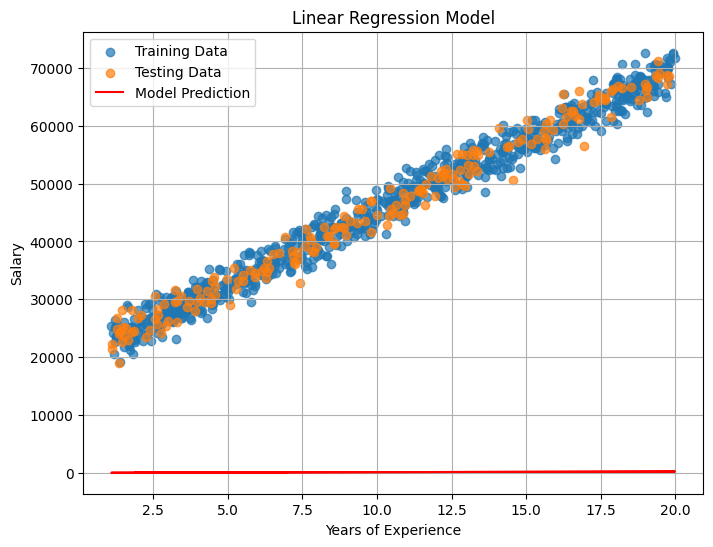

In [92]:
# Visualize the predictions
with torch.no_grad():
    train_predictions = model(X_train).numpy()
    test_predictions = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Training Data", alpha=0.7)
plt.scatter(X_test, y_test, label="Testing Data", alpha=0.7)
plt.plot(X_train, train_predictions, color="red", label="Model Prediction")
plt.title("Linear Regression Model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()

## Transition to a Multi-Layer Model

### Enhancing the Architecture
After successfully implementing and training a single-node linear regression model, the next step is to transition into a more complex **multi-layer neural network**. This allows us to capture **non-linear relationships** in the data, making the model more versatile and capable of handling a wider range of problems.

### Key Changes
1. **Architecture**:
   - Replace the single-layer linear model with a network consisting of multiple layers, enabling the model to learn hierarchical representations of the data.
   - Use activation functions (e.g., ReLU, Sigmoid) to introduce non-linearity.

2. **Training Process**:
   - Adjust the optimizer and learning rate to ensure efficient training for deeper architectures.
   - Implement regularization techniques (e.g., dropout) to prevent overfitting.

3. **Evaluation**:
   - Measure performance and compare it with the baseline single-node model to evaluate improvements.

---

This transition is a crucial step in building robust models that can tackle more complex tasks, such as classification and image recognition, in the future!

In [94]:
class SalaryNetComplex(nn.Module):
  def __init__(self, name: str):
    super(SalaryNetComplex, self).__init__()
    self.name = name
    self.layer1 = nn.Linear(1,8)
    self.layer2 = nn.Linear(8,4)
    self.layer3 = nn.Linear(4,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.layer3(x)
    return x

model = SalaryNetComplex("SalaryNetComplex")
print("name of the model:", model.name)
print("model architecture:")
print(model)

name of the model: SalaryNetComplex
model architecture:
SalaryNetComplex(
  (layer1): Linear(in_features=1, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


In [95]:
# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("starting training loop!")
# training loop
epochs = 10000
for epoch in range(epochs):
  # set the training mode
  model.train()
  # forward pass
  y_pred = model(X_train)
  # compute the loss
  loss = criterion(y_pred, y_train)
  # backward the loss and compute gradients
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{epochs}]: Training Loss: {loss.item()}")
print("finshing training loop!")

starting training loop!
Epoch [100/10000]: Training Loss: 2330325248.0
Epoch [200/10000]: Training Loss: 2327608320.0
Epoch [300/10000]: Training Loss: 2322133760.0
Epoch [400/10000]: Training Loss: 2312745728.0
Epoch [500/10000]: Training Loss: 2298378752.0
Epoch [600/10000]: Training Loss: 2278110720.0
Epoch [700/10000]: Training Loss: 2251179008.0
Epoch [800/10000]: Training Loss: 2216994304.0
Epoch [900/10000]: Training Loss: 2175140352.0
Epoch [1000/10000]: Training Loss: 2125376512.0
Epoch [1100/10000]: Training Loss: 2067638656.0
Epoch [1200/10000]: Training Loss: 2002034688.0
Epoch [1300/10000]: Training Loss: 1928841472.0
Epoch [1400/10000]: Training Loss: 1848496640.0
Epoch [1500/10000]: Training Loss: 1761590784.0
Epoch [1600/10000]: Training Loss: 1668854912.0
Epoch [1700/10000]: Training Loss: 1571147392.0
Epoch [1800/10000]: Training Loss: 1469437568.0
Epoch [1900/10000]: Training Loss: 1364788096.0
Epoch [2000/10000]: Training Loss: 1258333440.0
Epoch [2100/10000]: Train

In [96]:
# evaluating the model
model.eval()
with torch.no_grad():
  y_pred = model(X_test)
  test_loss = criterion(y_pred, y_test)
  print(f"Test Loss: {test_loss.item()}")
  print(f"Square Root of Test Loss: {np.sqrt(test_loss.item())}")

Test Loss: 42349212.0
Square Root of Test Loss: 6507.627217350422


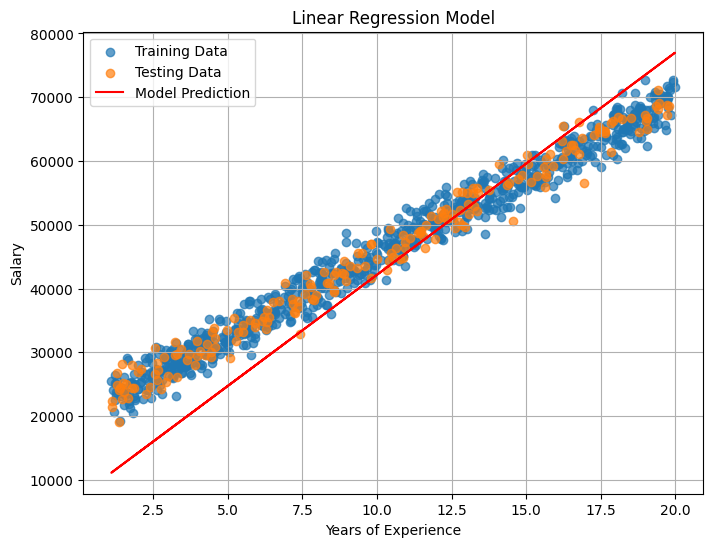

In [97]:
# Visualize the predictions
with torch.no_grad():
    train_predictions = model(X_train).numpy()
    test_predictions = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Training Data", alpha=0.7)
plt.scatter(X_test, y_test, label="Testing Data", alpha=0.7)
plt.plot(X_train, train_predictions, color="red", label="Model Prediction")
plt.title("Linear Regression Model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()

In [106]:
# saving the model (complex) architecure and parameters
torch.save(model, "salary_net_complex.pth")

## Building a Small Application: Predict Salary

### Objective
As the next step in this project, we’ll build a simple **interactive application** that allows users to input the number of years of experience and outputs the predicted salary. This application demonstrates the practical usage of our trained model.

### Features
1. **Input**:
   - The user will provide the number of years of experience as input.
2. **Prediction**:
   - The application will use the trained model to predict the corresponding salary based on the input.
3. **User Experience**:
   - The app will be designed to provide clear and user-friendly outputs.
   
### Purpose
This exercise bridges the gap between model development and real-world applications, showcasing how machine learning models can be used to solve everyday problems interactively.

---

Let's bring the model to life with this small, yet impactful application! 🚀

In [110]:
# adding in input years of experience and generating salary output
model.eval()
with torch.no_grad():
  years = float(input("enter the years of experience: "))
  salary = model(torch.tensor([[years]]).float())
  print(f"predicted salary for {years} years of experience: {round(salary.item(),3)} $")

enter the years of experience: 15.0
predicted salary for 15.0 years of experience: 59579.254 $
